В домашнем задании нужно решить задачу классификации наличия болезни сердца у пациентов. Целевая переменная – наличие болезни сердца (HeartDisease), принимает значения 0 или 1 в зависимости от отсутствия или наличия болезни соответственно.

In [381]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

In [382]:
data = pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [383]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [384]:
data['RestingBP'].sort_values().unique()

array([  0,  80,  92,  94,  95,  96,  98, 100, 101, 102, 104, 105, 106,
       108, 110, 112, 113, 114, 115, 116, 117, 118, 120, 122, 123, 124,
       125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137,
       138, 139, 140, 141, 142, 143, 144, 145, 146, 148, 150, 152, 154,
       155, 156, 158, 160, 164, 165, 170, 172, 174, 178, 180, 185, 190,
       192, 200])

In [385]:
data['Cholesterol'].sort_values().unique()

array([  0,  85, 100, 110, 113, 117, 123, 126, 129, 131, 132, 139, 141,
       142, 147, 149, 152, 153, 156, 157, 159, 160, 161, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 190, 192, 193,
       194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206,
       207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,
       220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
       233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245,
       246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258,
       259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271,
       272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284,
       285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 297, 298,
       299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312,
       313, 315, 316, 318, 319, 320, 321, 322, 325, 326, 327, 32

2. Подготовьте датасет к обучению моделей.
* Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.
* Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).

In [386]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

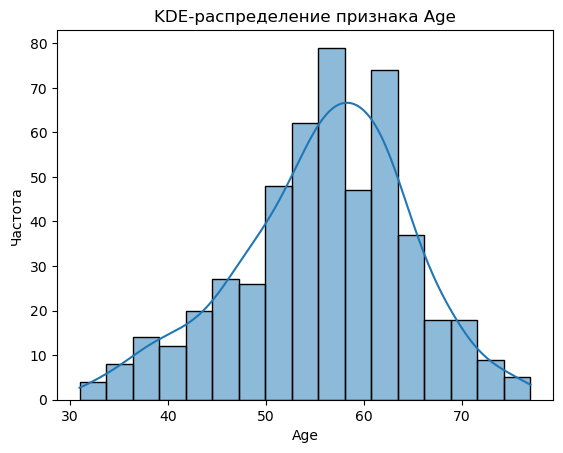

Возрастная группа риска пациентов с HeartDisease=1: 58


In [387]:
# Для начала оценим частоту встречаемости болезни сердца у пациентов в зависимости от их возраста

data_disease = data[data['HeartDisease'] == 1]
sns.histplot(data_disease['Age'], kde=True)

plt.xlabel('Age')
plt.ylabel('Частота')
plt.title('KDE-распределение признака Age')
plt.show()

mode_age_disease = data_disease['Age'].mode()[0]
print(f'Возрастная группа риска пациентов с HeartDisease=1: {mode_age_disease}')

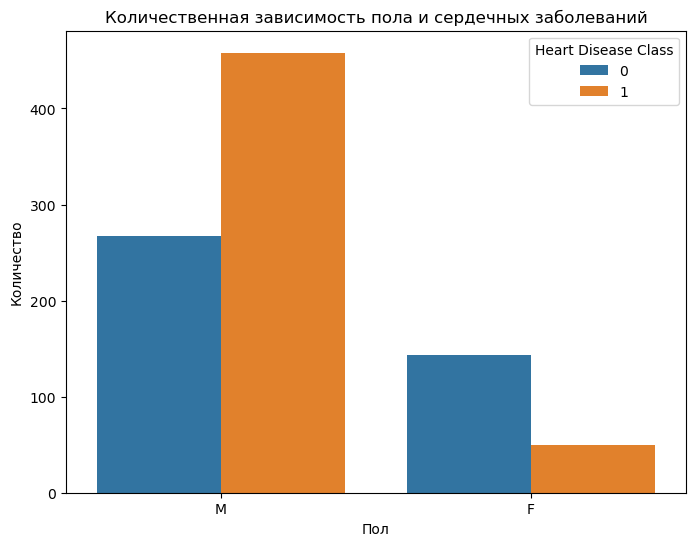

In [388]:
# Затем количественно определим кто больше подвержен заболеванию - женщины или мужчины 

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Sex', hue='HeartDisease')
plt.title('Количественная зависимость пола и сердечных заболеваний')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.legend(title='Heart Disease Class')
plt.show()

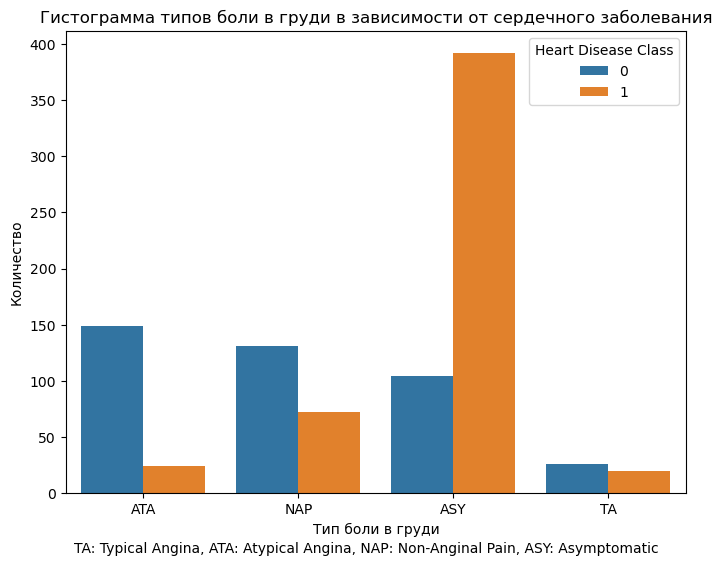

In [389]:
# Оценим тип боли в груди при наличии/отсутствии заболевания

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='ChestPainType', hue='HeartDisease')
plt.title('Гистограмма типов боли в груди в зависимости от сердечного заболевания')
plt.xlabel('Тип боли в груди')
plt.ylabel('Количество')
plt.legend(title='Heart Disease Class')
description = 'TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic'
plt.figtext(0.5, 0.01, description, ha='center', fontsize=10)
plt.show()

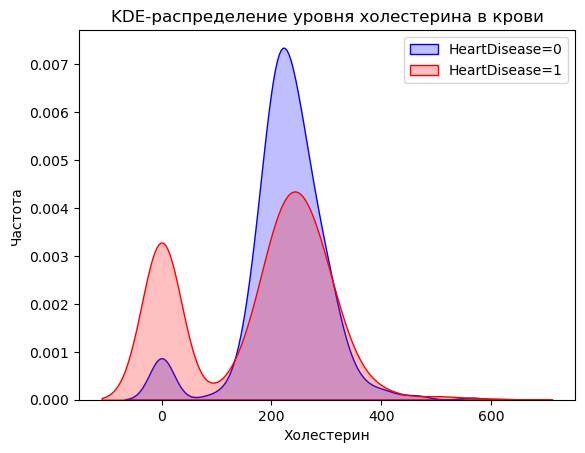

In [390]:
sns.kdeplot(data[data['HeartDisease'] == 0]['Cholesterol'], fill=True, color="blue",label='HeartDisease=0')
sns.kdeplot(data[data['HeartDisease'] == 1]['Cholesterol'], fill=True, color="red",label='HeartDisease=1')
plt.legend()
plt.xlabel('Холестерин')
plt.ylabel('Частота')
plt.title('KDE-распределение уровня холестерина в крови')
plt.show()

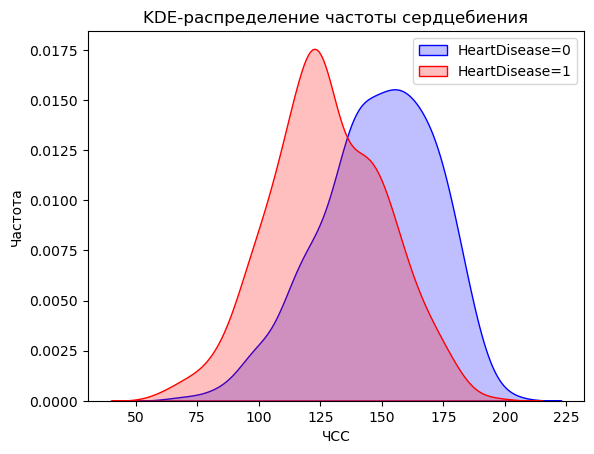

In [391]:
sns.kdeplot(data[data['HeartDisease'] == 0]['MaxHR'], fill=True, color="blue",label='HeartDisease=0')
sns.kdeplot(data[data['HeartDisease'] == 1]['MaxHR'], fill=True, color="red",label='HeartDisease=1')
plt.legend()
plt.xlabel('ЧСС')
plt.ylabel('Частота')
plt.title('KDE-распределение частоты сердцебиения')
plt.show()

/var/folders/y4/m_h08_mx5632hfk34wzwpt4c0000gn/T/ipykernel_11143/2488411993.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


Text(0.5, 1.0, 'Корреляционная матрица признаков')

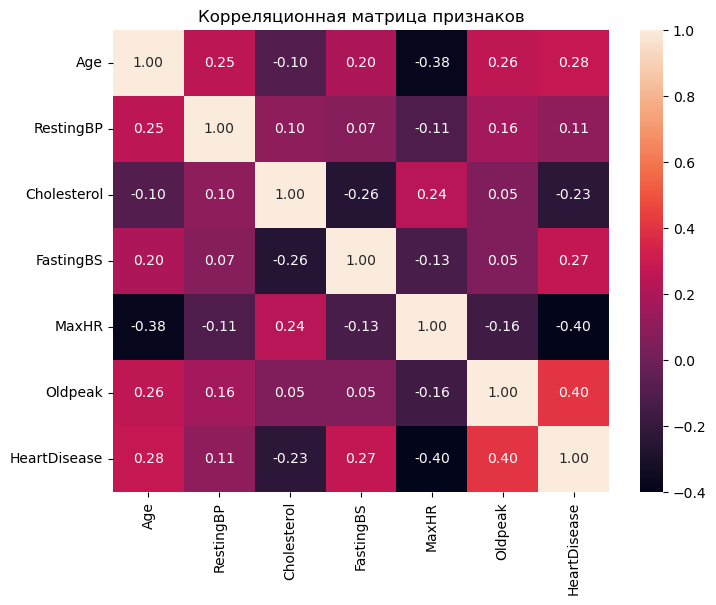

In [392]:
corr_matrix = data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')

plt.title('Корреляционная матрица признаков')

In [393]:
data_encoded = pd.get_dummies(data, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])
data_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [394]:
data_encoded.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [395]:
X = data_encoded.drop('HeartDisease',axis=1)
y = data_encoded['HeartDisease']

In [396]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4. Обучите дерево решений на обучающем множестве. Используйте следующие модели:
* tree.DecisionTreeClassifier
* ensemble.RandomForestClassifier
5. Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.

In [397]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [398]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [399]:
# Наблюдаем переобучение

report_train = classification_report(y_train, y_train_pred)
print(report_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       1.00      1.00      1.00       401

    accuracy                           1.00       734
   macro avg       1.00      1.00      1.00       734
weighted avg       1.00      1.00      1.00       734



In [400]:
report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.83      0.78        77
           1       0.86      0.78      0.82       107

    accuracy                           0.80       184
   macro avg       0.80      0.80      0.80       184
weighted avg       0.81      0.80      0.80       184



In [401]:
# Зададим параметры для поиска про сетке с помощью GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],      
    'max_depth': [3, 5, 10, None],        
    'min_samples_split': [2, 5, 10],     
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,                
    scoring='accuracy',  
    n_jobs=-1,           
    verbose=1     
)

grid_search.fit(X_train, y_train)

print(f'Лучшие параметры: {grid_search.best_params_}')
print(f'Accuracy: {grid_search.best_score_:.2f}')

best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Лучшие параметры: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy: 0.83


In [402]:
report_train = classification_report(y_train, y_train_pred)
print(report_train)

              precision    recall  f1-score   support

           0       0.93      0.80      0.86       333
           1       0.85      0.95      0.90       401

    accuracy                           0.88       734
   macro avg       0.89      0.87      0.88       734
weighted avg       0.88      0.88      0.88       734



In [403]:
report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.84      0.83        77
           1       0.88      0.86      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [404]:
randomforest = RandomForestClassifier(random_state=42)
randomforest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [405]:
y_train_pred = randomforest.predict(X_train)
y_test_pred = randomforest.predict(X_test)

In [406]:
report_train = classification_report(y_train, y_train_pred)
print(report_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       1.00      1.00      1.00       401

    accuracy                           1.00       734
   macro avg       1.00      1.00      1.00       734
weighted avg       1.00      1.00      1.00       734



In [407]:
report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.88      0.87        77
           1       0.91      0.89      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184



In [408]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f'Лучшие параметры: {grid_search.best_params_}')
print(f'Accuracy: {grid_search.best_score_:.2f}')

best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Лучшие параметры: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.88


In [409]:
report_train = classification_report(y_train, y_train_pred)
print(report_train)

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       333
           1       0.92      0.95      0.94       401

    accuracy                           0.93       734
   macro avg       0.93      0.93      0.93       734
weighted avg       0.93      0.93      0.93       734



In [410]:
report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        77
           1       0.90      0.90      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



6. Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.

In [411]:
importances = pd.Series(randomforest.feature_importances_)

In [412]:
importances.index = pd.Series(X_train.columns)

In [413]:
importances = importances.sort_values(ascending=False)
importances

ST_Slope_Up          0.150808
Oldpeak              0.111173
Cholesterol          0.096734
MaxHR                0.090124
ST_Slope_Flat        0.083086
Age                  0.080515
ExerciseAngina_N     0.073522
ExerciseAngina_Y     0.065529
RestingBP            0.062525
ChestPainType_ASY    0.053419
Sex_F                0.024511
FastingBS            0.018903
Sex_M                0.018743
ChestPainType_NAP    0.013220
ChestPainType_ATA    0.013126
RestingECG_LVH       0.012415
RestingECG_Normal    0.010993
RestingECG_ST        0.008355
ST_Slope_Down        0.006737
ChestPainType_TA     0.005562
dtype: float64

7. Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier. Повторите п. 5

In [414]:
bagging = BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators=50,
                            max_samples=0.8,
                            max_features=1,
                            bootstrap=True,
                            random_state=42)

bagging.fit(X_train, y_train)
y_test_pred = bagging.predict(X_test)

report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        77
           1       0.87      0.91      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.87      0.87      0.87       184



8. Обучите стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC. Используйте ensemble.StackingClassifier. Повторите п. 5

In [415]:
stacking = StackingClassifier(
    [
        ('DecisionTree', DecisionTreeClassifier(random_state=42)),
        ('RandomForest', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('SVM', make_pipeline(StandardScaler(), LinearSVC(max_iter=10000, random_state=42)))
    ], LogisticRegression())

stacking.fit(X_train, y_train)
y_test_pred = stacking.predict(X_test)

report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.87      0.84        77
           1       0.90      0.86      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



9. Сформулируйте выводы по проделанной работе.
* Сравните метрики построенных моделей.
* Напишите свое мнение, какая модель наилучшая и почему.

### Лучший результат показал алгоритм случайного леса RandomForestClassifier с подбором наилучших гиперпараметров модели по сетке GridSearchCV.